# Transformers for POS Tagging



The goal of this lab are the following:
* Import existing model 
* Learn to use Goooooooogleeeee
* FineTune the model for PoS Tagging
* Write a Trainer

Disclaimer : This lab is a lil bit complex. We will help you a bit more.



We'll be using a transformer model in order to perform POS Tagging : BERT.
BERT Paper : https://arxiv.org/abs/1810.04805



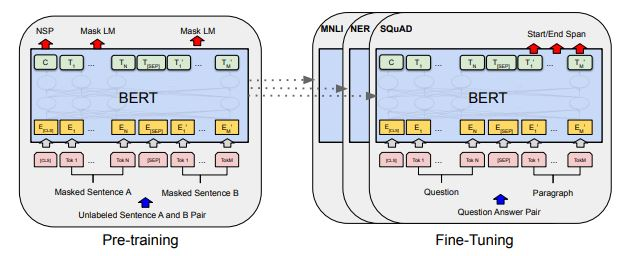

BERT Model is a big model. You wont' have the time to pretrain it from scratch. 

Wikipedia : 
Part-of-speech tagging (POS tagging or PoS tagging or POST), also called grammatical tagging is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech, based on both its definition and its context. A simplified form of this is commonly taught to school-age children, in the identification of words as nouns, verbs, adjectives, adverbs, etc.
Have a quick look at :
* UD TAGS : https://universaldependencies.org/u/pos/

* With you understanding of the task, what type of task are we doing ?
* How could we perform that task ?


<img src="https://www.hub-franceia.fr/wp-content/uploads/2021/03/CPLogos228829.jpg">

We will use a model that what pretrained thanks to HuggingFace.


In [ ]:
!pip install transformers

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchtext.legacy import data
from torchtext.legacy import datasets
from transformers import BertTokenizer, BertModel
import numpy as np
import time
import random
import functools

# Some explanation on BERT 

As seen in class, Transformers take tokens. 
BERT Model was trained on two tasks. As you might have seen, BERT sequences begins with a specific [CLS] token.

for example, the sentence :

'I went to the CAF' =>**[[CLS],I,went,to,the,CAF]**


---


**Explain the purpose of this [CLS] token**


---


We also use [PAD] and [UNK] tokens:
  * [PAD] : padding is used to pad sentences to sentences of same length.
  * [UNK] : unknown is used for unknown word of the vocabulary

More tokens exists. Have a look at : https://huggingface.co/transformers/model_doc/bert.html#transformers.BertTokenizer
Have a look at the vocab used to train BERT


We then convert it to indexes to make it more understandable for the model. As we are fine-tuning the BERT model, we need to stay along with the parameters the model was trained on. 

Hence, you will use the Tokenizer 'bert-base-uncased' that contains the needed tokens.


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# retrieve the above mentioned Tokens from the tokenizer
init_token = 
pad_token = tokenizer.pad_token
unk_token = tokenizer.unk_token

# convert the tokens to integer values
init_token_idx = tokenizer.convert_tokens_to_ids(init_token)
pad_token_idx = tokenizer.convert_tokens_to_ids(pad_token)
unk_token_idx = tokenizer.convert_tokens_to_ids(unk_token)

What is the max size of a sentence? use :
**tokenizer.max_model_input_sizes['bert-base-uncased']**

In [ ]:
unk_token_idx

In [ ]:
max_input_length = tokenizer.max_model_input_sizes['bert-base-uncased']

# Dataset

Ths part is the most time consuming  part. Our goal is to create the dataset for the training.. As you know, we might need some preprocessing.You got some chance ! As UDPOS dataset is already labellized. But we need some preprocessing to send it to BERT.

More information on UDPOS : 
* https://pytorch.org/text/stable/_modules/torchtext/datasets/udpos.html
* https://universaldependencies.org/fr/pos/index.html

What kind of preprocessing do we need ? 



In fact we are going to create the processing pipeline that will be applied to each data that will be used for training. The creation of the pipeline is compsed of few steps :

* Definition of the function(s) to apply to the dataset
* Creation of a tool to send the function to the Dataset
* Creation of a FIELD Pytorch Dataset that will apply the pipeline for us.

It can be seen as the transform step when you previously defined models for image tasks.

You will use functool to return the functions into your datasets. Functools returns functions or are applied into function..
More information on functools : https://docs.python.org/fr/3/library/functools.html

As a preprocessing we will need two thing:
*  Convert the sentences to ids
*  Convert the sentences to a certain length

In [ ]:
def cut_and_convert_to_id(tokens, tokenizer, max_input_length):

    return tokens

def cut_to_max_length(tokens, max_input_length):

    return tokens

In [ ]:
text_preprocessor = functools.partial(cut_and_convert_to_id,
                                      tokenizer = tokenizer,
                                      max_input_length = max_input_length)

You have previously used TorchVision to make some data peocessing on Image data.
Let me present you its sibling : TorchText. TorchText is used for processing textual data.

Field is a base datatype of PyTorch Text that helps with text preprocessing: tokenization, lowercasting, padding and Building vocabulary.


In [ ]:
TEXT = data.Field(use_vocab = False,
                  lower = True,
                  preprocessing = text_preprocessor,
                  init_token = init_token_idx,
                  pad_token = pad_token_idx,
                  unk_token = unk_token_idx)

UD_TAGS = data.Field(unk_token = None,
                     init_token = '<pad>',
                     preprocessing = tag_preprocessor)

UPDOS is a parsed text corpus dataset that clarifies syntactic or semantic sentence structure. The datasets follow the original format from the Universal Dependencies(an open network exertion with more than 300 contributors delivering more than 150 treebanks in 90 dialects) English Treebank.

You want two specific fields that are linked in the dataset :
* text 
* udtags

The train,valid,test dataset will be generated from the UDPOS dataset.

In [ ]:
fields = (("text", TEXT), ("udtags", UD_TAGS))
train_data, valid_data, test_data = datasets.UDPOS.splits(fields)

Show some examples of the train_data. To help you, we defined a function.


Each piece of data is a dictionnary with 'text', 'udtags' as keys.

In [ ]:
def return_example(data,idx):
    text , udtags = vars(data.examples[idx])['text'], vars(data.examples[idx])['udtags']
    return text , udtags

text, udtags = return_example(train_data,0)

Now you need to build the TAGs to create your TAG vocabulary. Simply use .build_vocab(data) and check what values are present. What's the purpose of creating a vocabulary ?

In [ ]:
UD_TAGS.build_vocab(train_data)
print(UD_TAGS.vocab.stoi)

Finally define your iterator. Iterator are used as Dataloaders. The model will load data by Iterating through the Iterator.. Use a BucketIterator.

Don't forget  to define :
* Batch_size
* Device 


In [ ]:
batch_size = 
device =
train_iterator, valid_iterator, test_iterator = data.BucketIterator

# Correction

In [ ]:
batch_size = 32
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits((train_data, valid_data, test_data), 
                                                                           batch_size = batch_size,
                                                                           device = device)

# Model Definition

As you know you will be finetuning a BERT model in order to perform PoS Tagging.
* Quickly explain how BERT was trained.
* Is this finetuning useful?
* How would you finetune the model ?

We have seen in class that BERT's embeddings are contextuallized.

* What does it mean ?
* In your Report put a scheme of the Model you'll be training. Don't forget to highlight the contextualization

Your model should not (?) be complex as BERT handles the lost complex parts. Think of BERT as an embedding layer that proccesses your sequential Data. We want to predict the tag of each token for an input sequence.

* What kind of layer could we use ?
* What's the output dimension ?
* What loss could we use ?
* Would you use a high learning rate or a small learning rate ?



---


Some Coding Things : 
* Bert wants sequences with batch element first, that's why we use permute((1,0)
* The embedding_size is not defined. In fact, as we load a pretrained model we could modify it by deleting the wanted layers. HOWEVER, once deleted, the pretrained model won't be loaded as the parameters won't match. To tackle this, we define a variable that get's the embedding size.
* To check the size of the UD tags use : len(UD_TAGS.vocab)



---



In [ ]:
class BERTPoSTaggingModel(nn.Module):
    def __init__(self,output_dim):
        super().__init__()
        self.bert = 
        embedding_dim = self.bert.config.to_dict()['hidden_size']
 
    def forward(self, text):
        text = text.permute(1, 0)

        
        return predictions

Just for your knwoledge count the number of parameter your created model has. We provide tyou a count_parameter function

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')


# HyperParameters and Training defintion

Now you will define values that are necessary for training.
* What are those parameters ? Are they hyperparameters ?

When defining your loss you should be aware of the [PAD] token. 
* What could be the problem ?
* Do they contribute to something in the learning ?
* Should we backward the [PAD] token's gradient ?
If yes, check ignore_index= TAG_PAD_IDX, if no, check ignore_index.


We define TAG_PAD_IDX to help you as the index of the padding token

Don't forget to send model and criterion to the device

In [ ]:
TAG_PAD_IDX = UD_TAGS.vocab.stoi[UD_TAGS.pad_token]

learning_rate = 
optimizer = 
criterion = 


# Train, Test, Evaluate

Now create your training loop? Remember what you've done in the previous Labs. To help you ask yourself the following questions : 
* What does a Training Loop need ?
* What does a Evaluation Loop need ? 
* Is there a way to modify a training loop into an evaluation loop ?
* What could be your loss ? 
* Can I calculate an Accuracy ?
* How would I calculate an accuracy ?


To help you, we will write a Trainer. We've seen before that PyTorch Lightning proposes to use Trainers.
Suppose we don't like Lightning 😔,  
we are going to create our own trainer ! (YEAYYYYY) 

The trainer you'll write is a really simple Trainer. 



Your Trainer will take the following variables as input : 
* model
* train_iterator, valid_iterator
* optimizer
* criterion

In [ ]:
class Trainer():
    def __init__(self,model,train_iterator,valid_iterator,optimizer,criterion,tag_pad_idx):
        self.model = model
        self.train_iterator = train_iterator
        self.valid_iterator = valid_iterator
        self.optimizer  =  optimizer
        self.criterion = criterion
        self.tag_pad_idx = tag_pad_idx


    def categorical_accuracy(self,preds, y, tag_pad_idx):
        """
        Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
        """
        max_preds = preds.argmax(dim = 1, keepdim = True) # get the index of the max probability
        non_pad_elements = (y != tag_pad_idx).nonzero()
        correct = max_preds[non_pad_elements].squeeze(1).eq(y[non_pad_elements])
        return correct.sum() / torch.FloatTensor([y[non_pad_elements].shape[0]]).to(device)

    def train(self):   
        epoch_loss = 0
        epoch_acc = 0
        for batch in self.train_iterator:                
            text = batch.text
            tags = batch.udtags
            
            epoch_loss += loss.item()
            epoch_acc += acc.item()            
        return epoch_loss / len(self.train_iterator), epoch_acc / len(self.train_iterator)


    def evaluate(self):        
        epoch_loss = 0
        epoch_acc = 0
        self.model.eval()        
        with torch.no_grad():        
            for batch in self.valid_iterator:
                text = batch.text
                tags = batch.udtags                
                
                epoch_loss += loss.item()
                epoch_acc += acc.item()            
        return epoch_loss / len(self.valid_iterator), epoch_acc / len(self.valid_iterator)

# Now launch the Training

Now the training steps are defined, create the full training loop.
Define a number of epochs. We recommend you to train it for a max of 3 epochs as the models takes a lot of time to train Be careful the training will take time. (approx 6 min epr epoch,depending your GPU) 
(Go grab a Coffee or Make your report)

In [ ]:
N_EPOCHS = 1
train_ = Trainer(model, train_iterator, valid_iterator, optimizer, criterion, TAG_PAD_IDX)
best_valid_loss = float('inf')
for epoch in range(N_EPOCHS):
    start_time = time.time()    
    train_loss, train_acc = train_.train()
    valid_loss, valid_acc = train_.evaluate()
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'fine_tuned_model.pt')
    
    # print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

# Test

now you've trained your model by fine-tuning it.

Test the model on few sentences. You function must contain few things:
* The model and the checkpoint path
* a sentence and all its needed preprocessing (tokenizing, id conversioni, unknown tokens 
* the vocabularies :text and tag

We provide you the skeleton of the Class you will be building in order to infere the sentence.. This is a sumup of all the lab ;)

In [ ]:
class Tag_Sentence():
    def __init__(self, sentence,tokenizer, text_field, tag_field, model, device):
        self.sentence = sentence
        self.tokenizer = tokenizer
        self.text_field = text_field
        self.tag_field = tag_field
        self.device = device
        self.model = model

    def convert_sequence_to_token(self):
        """
        converts the sentence into tokens. 
        check if tokens are already provided else convert the sentence into tokens
        """
        return tokens
    
    def convert_tokens_to_id(self):

        """
        Now take the tokens and create the id-ized tokens. Don't forget to add the beginning token.
        """
        tokens = self.convert_sequence_to_token()      



        return numericalized_tokens ,tokens

    def create_unknown_token(self):
        
        numericalized_tokens, tokens = self.convert_tokens_to_id()                
        unk_idx = self.text_field.unk_token 
        unks = [t for t, n in zip(tokens, numericalized_tokens) if n == unk_idx]
        return unks , numericalized_tokens ,tokens

    def send_to_model(self):
        """
        send the numericalized_token to model for inference.
        Don't forget to unsqueeze your data. 
        """
        unks , numericalized_tokens ,tokens = self.create_unknown_token()

        
        return prediction, tokens, unks

    def process_prediction(self):
        """
        Process your prediction, you  want the predicted tag that should correspond to something of you last layer.
        What could be that something ? (argmax as it is a classificaiotn)
        """
        prediction, tokens, unks = self.send_to_model()  


        assert len(tokens) == len(predicted_tags)
        return tokens, predicted_tags, unks

# Testing your model

Init the class and try different sentences.
Now use the code on few exemples to check the model.
* What could be done to get better results ?


In [ ]:

sentence = 'i will eat chicken for diner'

tokens, tags, unks = Tag_Sentence( sentence,tokenizer,TEXT,UD_TAGS,model, device).process_prediction()


print("Pred. Tag\tToken\n")

for token, tag in zip(tokens, tags):
    print(f"{tag}\t{token}")

# Outro

Ok. Be ready for next lab. It will be only one question and a Dataset.